In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from numpy import linalg as LA

In [3]:
# Cargando el documento csv y creando un dataframe
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
# creando un nuevo dataframe con las columnas de las caracteristicas
# eliminando la columna de la variedad porque contiene strings
df2= pd.DataFrame(np.array(df.iloc[:,0:4]),
                columns=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'])
df2

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
# se crea la columna de la variedad para poder agregar luego como index

variety = df.iloc[:,4]
variety

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [6]:
# conocer la cantidad de renglones
index = df.index
renglones = len(index)
renglones

150

In [7]:
# Estandarizando las caracteristicas
df2 = StandardScaler().fit_transform(df2)
df2

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [8]:
# calculando la matriz de correlacion

A= (1/renglones) * np.dot(df2.T,df2)
A

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [9]:
# Entrenamiento del modelo PCA con escalamiento

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df2)

# se extraen los componentes principales

modelo_pca = pca_pipe.named_steps['pca']
print('Eigenvalores:')
result = LA.eig(A)
print(result[0])

Eigenvalores:
[2.91849782 0.91403047 0.14675688 0.02071484]


In [10]:
print ('Este valor se obtiene dividiendo cada eigenvalor entre la suma de todos los eigenvalores')
print('\nPorcentaje de varianza explicada por cada componente:')
print(modelo_pca.explained_variance_ratio_)

Este valor se obtiene dividiendo cada eigenvalor entre la suma de todos los eigenvalores

Porcentaje de varianza explicada por cada componente:
[0.72962445 0.22850762 0.03668922 0.00517871]


In [11]:
# se crea un dataframe con los componentes principales

print('Eigenvectores por renglón:')
pd.DataFrame(data = modelo_pca.components_,
             columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'],
             index = ['PC1', 'PC2', 'PC3', 'PC4'])           

Eigenvectores por renglón:


,sepal.length,sepal.width,petal.length,petal.width
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,0.719566,-0.244382,-0.142126,-0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [12]:
# Proyeccion de los datos en el nuevo sistema de coordenadas

Proyeccion = np.dot(df2, modelo_pca.components_.T)
Proyeccion = pd.DataFrame(Proyeccion,
                          columns = ['PC1', 'PC2', 'PC3', 'PC4'],
                          index = variety)
Proyeccion

,PC1,PC2,PC3,PC4
variety,,,,
Setosa,-2.264703,0.480027,0.127706,-0.024168
Setosa,-2.080961,-0.674134,0.234609,-0.103007
Setosa,-2.364229,-0.341908,-0.044201,-0.028377
Setosa,-2.299384,-0.597395,-0.091290,0.065956
Setosa,-2.389842,0.646835,-0.015738,0.035923
...,...,...,...,...
Virginica,1.870503,0.386966,-0.256274,-0.389257
Virginica,1.564580,-0.896687,0.026371,-0.220192
Virginica,1.521170,0.269069,-0.180178,-0.119171


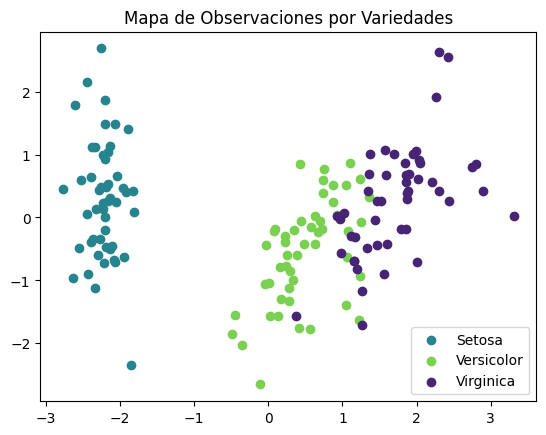

In [13]:
# Graficando los datos en el nuevo sistema de coordenadas
x = Proyeccion.iloc[:, 0]
y = Proyeccion.iloc[:, 1]
z = variety
# Convertir a numpy arrays
x = x.to_numpy()
y = y.to_numpy()

# Crear un diccionario para asignar un color a cada variedad
unique_varieties = list(set(z))
colors = plt.cm.viridis(np.linspace(0.1, 0.8, len(unique_varieties)))  
color_dict = {variety: color for variety, color in zip(unique_varieties, colors)}

# Crear el gráfico
fig, ax = plt.subplots()
ax.set_title('Mapa de Observaciones por Variedades')

# Graficar cada punto con su color correspondiente
for i in range(len(x)):
    ax.scatter(x[i], y[i], color=color_dict[z[i]], label=z[i])

# Añadir la leyenda sin duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
plt.show()

In [14]:
componentes2 = pd.DataFrame(modelo_pca.components_,
                            columns = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width'],
             index = ['PC1', 'PC2', 'PC3', 'PC4'])
componentes2 = componentes2.iloc[0:2,:]
componentes2 = componentes2.T
componentes2

,PC1,PC2
sepal.length,0.521066,0.377418
sepal.width,-0.269347,0.923296
petal.length,0.580413,0.024492
petal.width,0.564857,0.066942


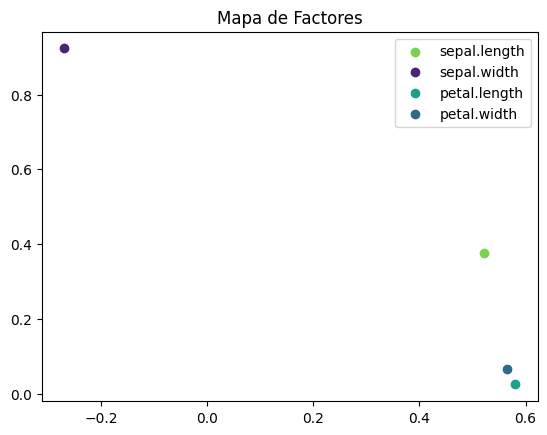

In [15]:
# Graficando los datos en el nuevo sistema de coordenadas
x = componentes2.iloc[:, 0]
y = componentes2.iloc[:, 1]
z = componentes2.index

# Convertir a numpy arrays
x = x.to_numpy()
y = y.to_numpy()

# Crear un diccionario para asignar un color a cada variedad
unique_varieties = list(set(z))
colors = plt.cm.viridis(np.linspace(0.1, 0.8, len(unique_varieties)))  
color_dict = {variety: color for variety, color in zip(unique_varieties, colors)}

# Crear el gráfico
fig, ax = plt.subplots()
ax.set_title('Mapa de Factores')

# Graficar cada punto con su color correspondiente
for i in range(len(x)):
    ax.scatter(x[i], y[i], color=color_dict[z[i]], label=z[i])

# Añadir la leyenda sin duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
plt.show()

In [21]:
# realizando una busqueda de un caso en especifico

# Encontrar la variedad con el sépalo más ancho
max_sepal_width = df.groupby('variety')['sepal.width'].max()
variety_with_max_sepal_width = max_sepal_width.idxmax()
max_width_value = max_sepal_width.max()

print(f"La variedad con el sépalo más ancho es: {variety_with_max_sepal_width} con un ancho de {max_width_value}")

La variedad con el sépalo más ancho es: Setosa con un ancho de 4.4


In [24]:
# Encontrar la variedad con el sépalo más largo
max_sepal_length = df.groupby('variety')['sepal.length'].max()
variety_with_max_sepal_length = max_sepal_length.idxmax()
max_lenght_value = max_sepal_length.max()

print(f"La variedad con el sépalo más largo es: {variety_with_max_sepal_length} con un largo de {max_lenght_value}")

La variedad con el sépalo más largo es: Virginica con un largo de 7.9
